In [1]:
from collections import Counter
from itertools import combinations

from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
style = plt.style.use('../config/paper_protein_content.mplstyle')

In [3]:
data = pd.read_excel('../results/datasets_calculations.xlsx')

In [4]:
data.head()

,object,study,code,method,n_proteins,n_assigned_proteins,assigned_percent,assigned_copies_percent,total_copies_per_cell,total_copies_per_um3,core_input,core_copies_percent_n0,core_copies_percent_n1,core_input_percent
0,ecoli,taniguchi2010,TA10,FL,1018,1015,99.71,100.00,94571,43987,True,0.739465,0.871640,0.444325
1,ecoli,valgepea2013,VA13,MS,1179,1179,100.00,100.00,4293284,1996876,True,0.877605,0.973178,1.000000
2,ecoli,li2014,LI14,RP,3883,3587,92.38,95.18,5627623,2617499,True,0.759078,0.866133,1.000000
3,ecoli,wisniewski2014,WI14,MS,2261,2228,98.54,96.88,1321542,614671,True,0.793106,0.902692,1.000000
4,ecoli,soufi2015,SO15,MS,1913,1912,99.95,100.00,11214979,5216269,True,0.799098,0.925206,1.000000


In [5]:
method_color_dict = {'MS': 'C0', 'FL': 'C2', 'RP': 'C4', 'WB': 'C1', 'SRM': 'C9'}

In [6]:
color_legend = [
    Line2D([0], [0], marker='o', markerfacecolor='C0', markeredgewidth=0, label='Shotgun', markersize=8, lw=0),
    Line2D([0], [0], marker='o', markerfacecolor='C9', markeredgewidth=0, label='SRM', markersize=8, lw=0),
    Line2D([0], [0], marker='o', markerfacecolor='C2', markeredgewidth=0, label='Fluorescence', markersize=8, lw=0),
    Line2D([0], [0], marker='o', markerfacecolor='C4', markeredgewidth=0, label='Ribosomal profiling', markersize=8, lw=0),
    Line2D([0], [0], marker='o', markerfacecolor='C1', markeredgewidth=0, label='Western blotting', markersize=8, lw=0)
]

In [8]:
title_dict = {'ecoli': 'E. coli',
              'scerevisiae': 'S. cerevisiae',
              'hela': 'HeLa'}

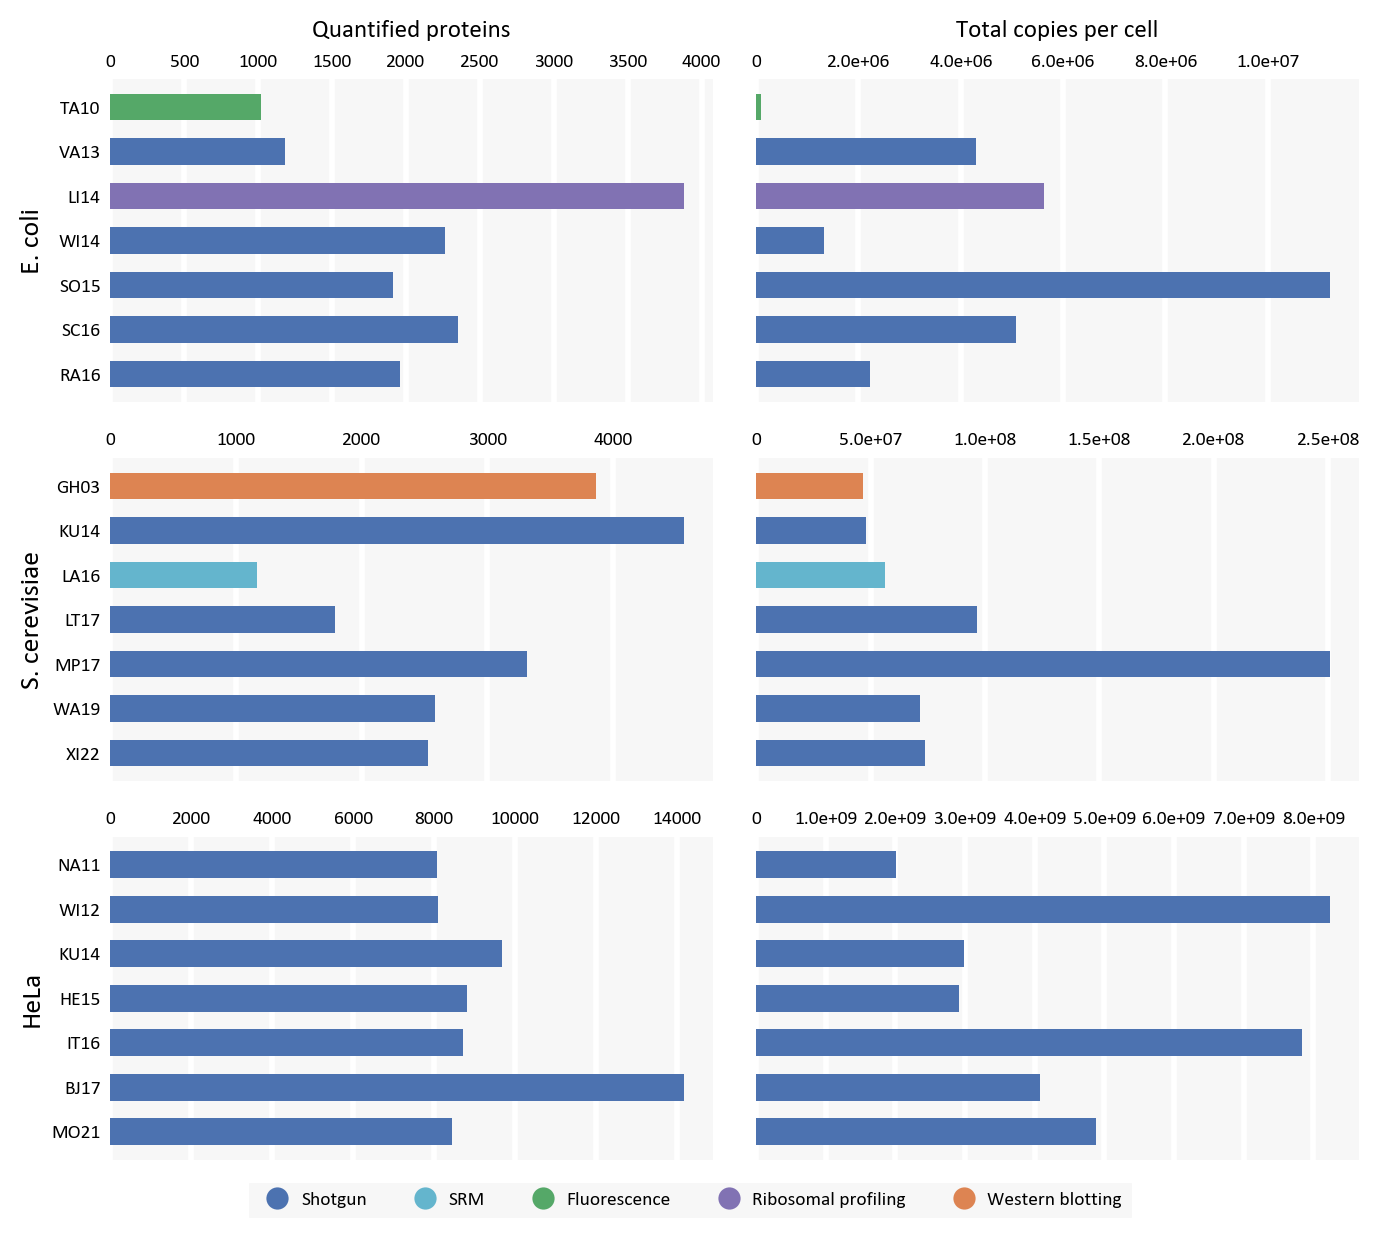

In [9]:
fig, axes = plt.subplots(3,2, figsize=(7,6), dpi=200, sharey='row', layout='tight')

for i, j in enumerate(data['object'].unique()):
    object_data_gen = data[data['object'] == j].set_index('code')
    
    object_colors = object_data_gen['method'][::-1].map(method_color_dict).values
    
    axes[i, 0].barh(y=range(len(object_data_gen)), 
                    width=object_data_gen['n_proteins'][::-1], 
                    height=0.6, 
                    color=object_colors)
    
    axes[i, 0].set(yticks=range(len(object_data_gen)), yticklabels=object_data_gen.index[::-1])
    axes[i, 0].grid(visible=False, axis='y')
    axes[i, 0].xaxis.tick_top()
    
    axes[i, 1].barh(y=range(len(object_data_gen)), 
                    width=object_data_gen['total_copies_per_cell'][::-1], 
                    height=0.6, 
                    color=object_colors)
    
    axes[i, 1].xaxis.set_major_formatter(lambda x, pos: 0 if x == 0.0 else f'{x:.1e}')
    axes[i, 1].grid(visible=False, axis='y')
    axes[i, 1].xaxis.tick_top()
    
    axes[i, 0].text(-0.15, 0.5, title_dict[j], transform=axes[i, 0].transAxes, rotation=90, va='center')
    
    axes[i, 0].tick_params(axis='both', labelsize=7)
    axes[i, 1].tick_params(axis='both', labelsize=7)
    
axes[0, 0].set_title('Quantified proteins', fontsize=9)
axes[0, 1].set_title('Total copies per cell', fontsize=9)
fig.legend(handles=color_legend, prop={'size': 7}, loc=8, bbox_to_anchor=(0.5, -0.03), handletextpad=0.2, ncol=5, framealpha=1)
                
plt.savefig('../results/graphs/graph_1_total_protein_copies.png', bbox_inches='tight')

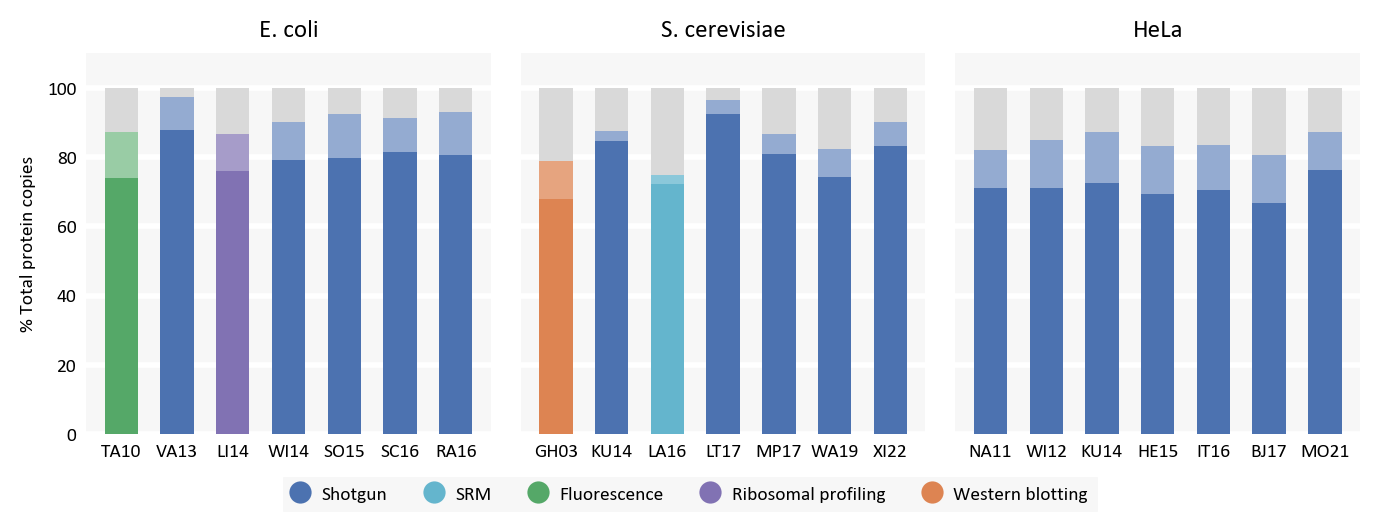

In [10]:
fig, axes = plt.subplots(1,3, figsize=(7, 2.5), dpi=200, layout='tight', sharey=True)

for i, j in enumerate(data['object'].unique()):
    object_data_gen = data[data['object'] == j].set_index('code')
    
    object_colors = object_data_gen['method'].map(method_color_dict).values
    object_colors_light = [sns.set_hls_values(i, l=0.7) for i in object_colors]
    
    axes[i].bar(x=range(len(object_data_gen)), height=100, width=0.6, color=sns.set_hls_values(sns.color_palette('deep')[7], l=0.85))
    axes[i].bar(x=range(len(object_data_gen)), height=object_data_gen['core_copies_percent_n1']*100, width=0.6, color=object_colors_light, label='Core - 1')
    axes[i].bar(x=range(len(object_data_gen)), height=object_data_gen['core_copies_percent_n0']*100, width=0.6, color=object_colors, label='Core')
    
    if i == 0:
        axes[i].set_ylabel('% Total protein copies', fontsize=7)
        
    axes[i].set(xticks=range(len(object_data_gen)), ylim=[0,110])
    axes[i].set_xticklabels(object_data_gen.index, fontsize=7)
    axes[i].grid(visible=False, axis='x')
    axes[i].set_title(title_dict[j], fontsize=9)
    axes[i].tick_params(labelsize=7)
    
fig.legend(handles=color_legend, prop={'size': 7}, loc=8, bbox_to_anchor=(0.5, -0.06), handletextpad=0.7, handlelength=0.8, ncol=5, framealpha=1)
    
plt.savefig('../results/graphs/graph_2_core_percent.png', bbox_inches='tight')

In [14]:
data_untargeted = data[~data['code'].isin(['TA10', 'GH03', 'LA16'])]

In [15]:
data_untargeted2 = data[~data['code'].isin(['TA10', 'GH03', 'LA16', 'LT17'])]

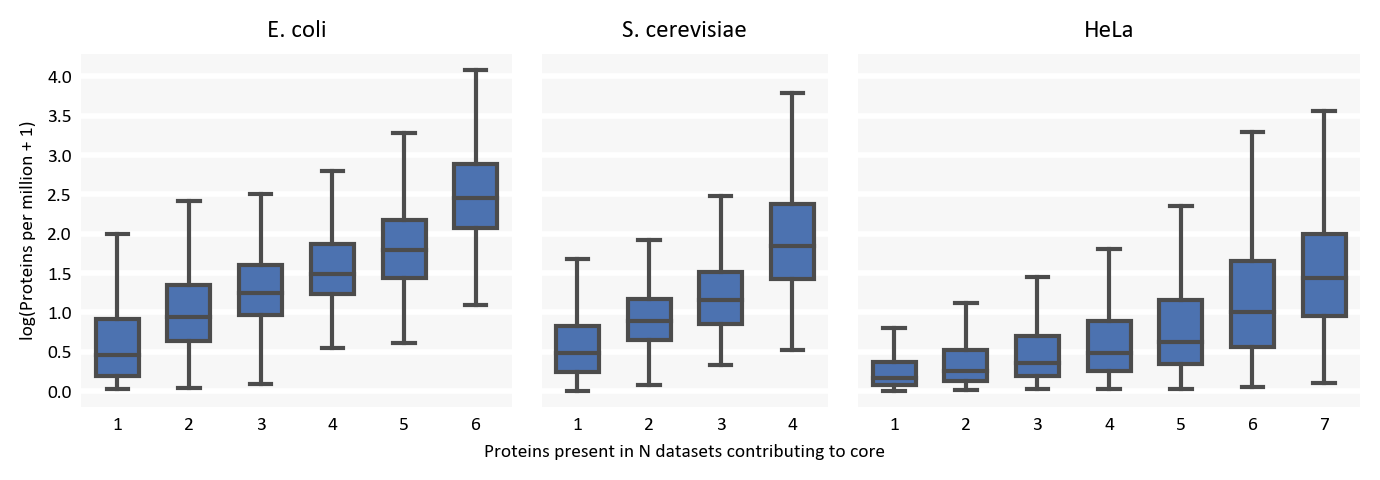

In [168]:
fig, axes = plt.subplots(1,3, figsize=(7,2.5), dpi=200, layout='tight', sharey=True, gridspec_kw={'width_ratios': data_untargeted2.groupby('object').size().iloc[[0,2,1]]})

for i, j in enumerate(data_untargeted2['object'].unique()):
    studies_object = data_untargeted2.loc[data_untargeted2['object'] == j, 'study']
    
    cores_object = pd.read_excel(f'../results/{j}_cores.xlsx')

    sns.boxplot(data=[np.log10(cores_object.loc[cores_object['n_datasets'] == k, 'parts_per_mil'] + 1) for k in range(1, len(studies_object)+1)], ax=axes[i], showfliers=False, color='C0', width=0.6, saturation=1.0)
    
    axes[i].grid(visible=False, axis='x')
    axes[i].set_xticks(range(len(studies_object)))
    
    axes[i].set_xticklabels([str(i) for i in range(1, len(studies_object)+1)], fontsize=7)
    axes[i].set_title(title_dict[j], fontsize=9)
    
    axes[0].set_ylabel('log(Proteins per million + 1)', fontsize=7)
    axes[1].set_xlabel('Proteins present in N datasets contributing to core', fontsize=7)
    axes[0].tick_params(axis='y', labelsize=7)

plt.savefig('../results/graphs/graph_3_core_expression.png', bbox_inches='tight')

In [ ]:
#Cores - 1

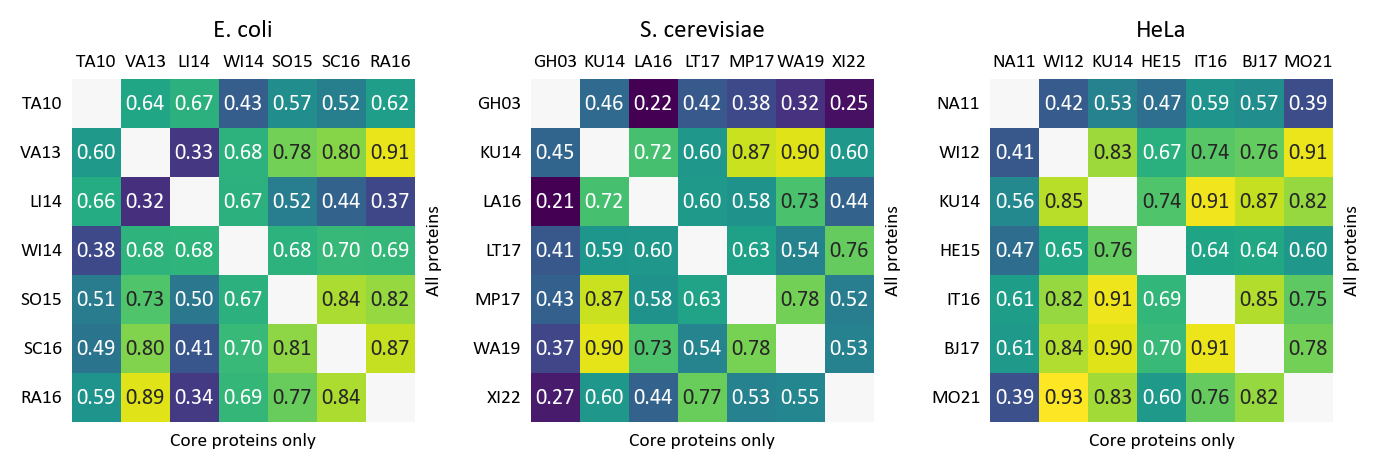

In [169]:
fig, axes = plt.subplots(1, 3, figsize=(7, 2.7), dpi=200, layout='tight')

for i, j in enumerate(data['object'].unique()):
    object_corr = pd.read_excel(f'../results/correlation_{j}.xlsx', index_col=0)
    object_corr.index = object_corr.index.map(data[data['object'] == j].set_index('study')['code'])
    object_corr.columns = object_corr.columns.map(data[data['object'] == j].set_index('study')['code'])
    
    sns.heatmap(ax=axes[i], 
                data=object_corr, 
                cmap='viridis', 
                annot=True, 
                fmt='.2f', 
                vmin=0.22, 
                vmax=0.93, 
                cbar=False, 
                square=True, 
                annot_kws={"fontsize":8})
    
    
    axes[i].set_yticklabels(labels=axes[i].get_yticklabels(), rotation=0, fontsize=7)
    axes[i].set_xticklabels(labels=axes[i].get_xticklabels(), rotation=0, fontsize=7)
    axes[i].xaxis.tick_top()
    axes[i].set_xlabel('Core proteins only', fontsize=7)
    axes[i].yaxis.set_label_position('right')
    axes[i].set_ylabel('All proteins', fontsize=7)
    axes[i].set_title(title_dict[j], fontsize=9)
    
plt.savefig('../results/graphs/graph_4_correlations.png', bbox_inches='tight')

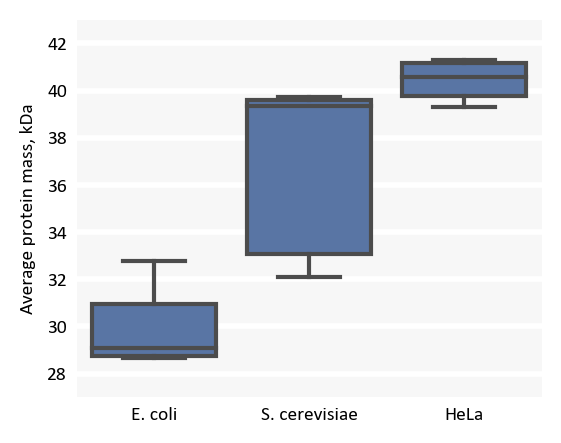

In [16]:
fig, axes = plt.subplots(figsize=(3, 2.5), dpi=200)

avg_mass = [[], [], []]

for k, o in enumerate(data_untargeted['object'].unique()):
    studies_object = data_untargeted.loc[data_untargeted['object'] == o, 'study']
    proteome = pd.read_excel(f'../data/processed/proteomes/{o}_proteome.xlsx')
    proteome = proteome.set_index('uniprot_id')['mass']
    
    datasets_object = [pd.read_excel(f'../data/processed/{o}/{i}_processed.xlsx') for i in studies_object]
    
    for i in datasets_object:
        i = i[i['assigned_id'] != '_other']
        masses = i['assigned_id'].map(proteome)
        avg_mass[k].append((i['copies_per_cell'] * masses).sum() / i['copies_per_cell'].sum())

avg_mass2 = [list(map(lambda x: x / 1000, i)) for i in avg_mass]
sns.boxplot(ax=axes, data=avg_mass2, color='C0', showfliers=False)

axes.set_ylim([27, 43])
axes.set_ylabel('Average protein mass, kDa', fontsize=7)
axes.set_xticklabels(title_dict.values(), fontsize=7)
axes.tick_params(labelsize=7)

plt.savefig('../results/graphs/graph_5_protein_mass.png', bbox_inches='tight')

In [17]:
avg_mass = [np.median(i) for i in avg_mass]

In [18]:
avg_mass = np.array(avg_mass)

In [19]:
avg_mass

array([29092.33037383, 39328.54952038, 40554.64259621])

In [20]:
milo_per_cell = np.divide(np.array([0.280, 5.65, 250]) * (6*10**23) * (10**(-12)), avg_mass)

In [21]:
milo_per_cell

array([5774717.866916812, 86196924.15159376, 3698713399.9306707],
      dtype=object)

In [22]:
np.divide(milo_per_cell, np.array([2.15, 42.0, 2425.0]))

array([2685915.286938052, 2052307.7178950894, 1525242.6391466684],
      dtype=object)

In [26]:
color_legend2 = [
    Line2D([0], [0], marker='o', markerfacecolor='C0', markeredgewidth=0, label='Shotgun', markersize=8, lw=0),
    Line2D([0], [0], marker='o', markerfacecolor='C9', markeredgewidth=0, label='SRM', markersize=8, lw=0),
    Line2D([0], [0], marker='o', markerfacecolor='C2', markeredgewidth=0, label='Fluorescence', markersize=8, lw=0),
    Line2D([0], [0], marker='o', markerfacecolor='C4', markeredgewidth=0, label='Ribosomal profiling', markersize=8, lw=0),
    Line2D([0], [0], marker='o', markerfacecolor='C1', markeredgewidth=0, label='Western blotting', markersize=8, lw=0),
    Line2D([0], [0], marker='o', markerfacecolor='C7', markeredgewidth=0, label='Average data', markersize=8, lw=0),
    Line2D([0], [0], color='C3', markeredgewidth=0, label='Estimate based on protein mass per cell', markersize=8, lw=3)
]

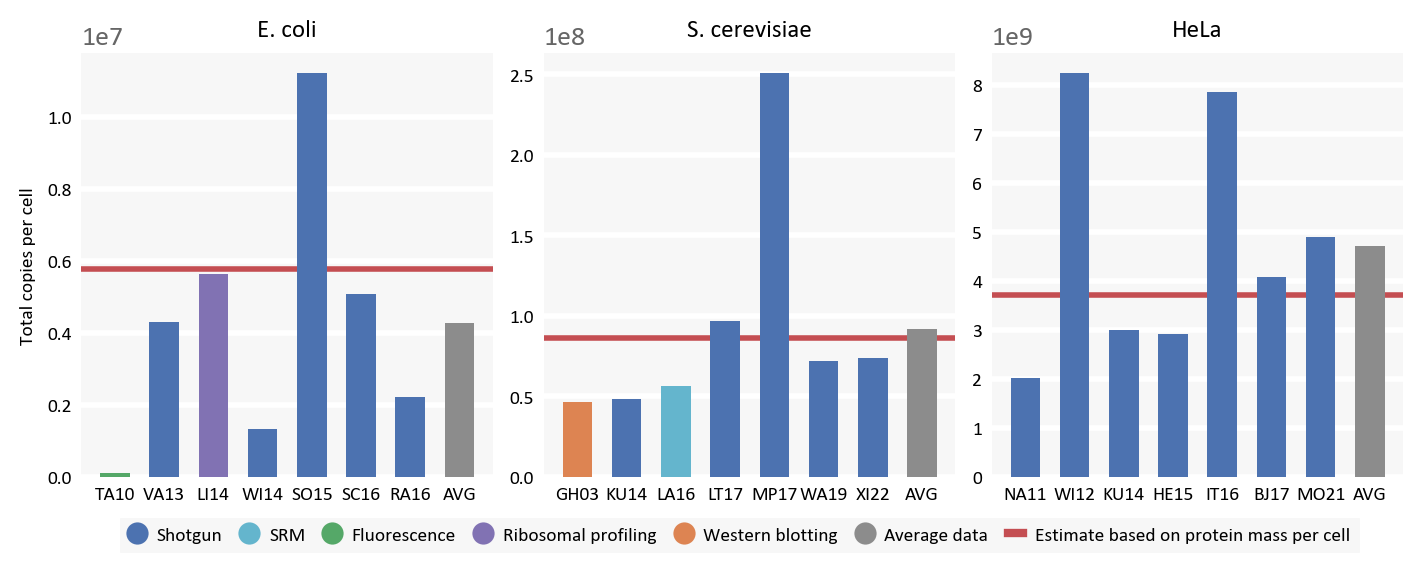

In [27]:
fig, axes = plt.subplots(1,3, figsize=(7, 2.5), dpi=200, layout='constrained')

for i, j in enumerate(data['object'].unique()):
    object_data_gen = data[data['object'] == j].set_index('code')
    
    object_colors = np.append(object_data_gen['method'].map(method_color_dict).values, 'C7') 
    
    axes[i].axhline(milo_per_cell[i], color='C3', zorder=1, linewidth=2)
    
    axes[i].bar(x=range(len(studies_object)+1), 
                height=np.append(object_data_gen['total_copies_per_cell'], object_data_gen['total_copies_per_cell'].mean()), 
                width=0.6, 
                color=object_colors, 
                zorder=2)

    axes[i].grid(visible=False, axis='x')
    axes[i].set_xticks(range(len(studies_object)+1))
    axes[i].set_xticklabels(list(object_data_gen.index) + ['AVG'], fontsize=7)
    axes[i].tick_params(axis='y', which='major', labelsize=7)
    axes[i].set_title(title_dict[j], fontsize=9)
    axes[0].set_ylabel('Total copies per cell', fontsize=7)
    
fig.legend(handles=color_legend2, prop={'size': 7}, loc=8, bbox_to_anchor=(0.52, -0.1), handletextpad=0.6, handlelength=0.8, ncol=7, framealpha=1, columnspacing=1)

plt.savefig('../results/graphs/graph_6_total_milo_comparison.png', bbox_inches='tight')

In [28]:
ribosomes = [31379, 220000, 4*10**6]

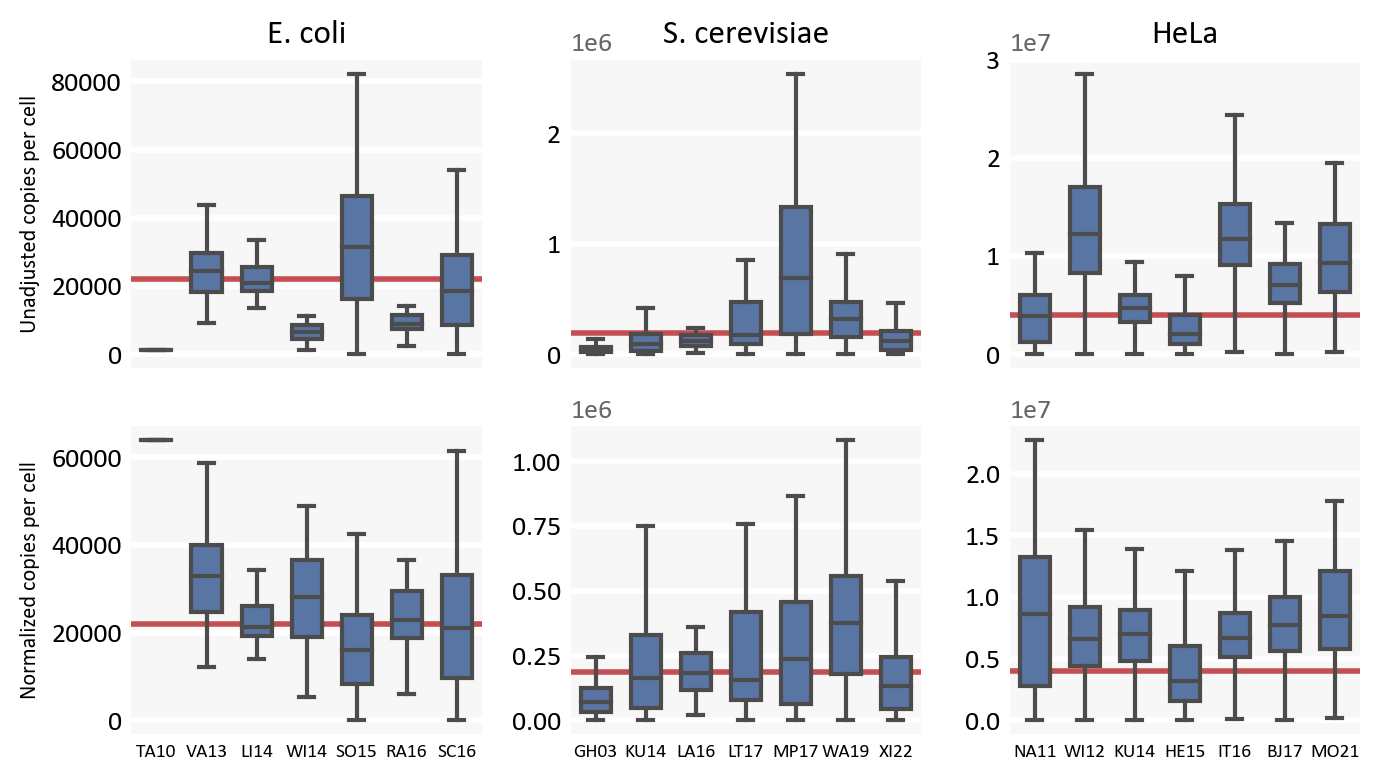

In [122]:
fig, ax = plt.subplots(2, 3, figsize=(7,4), dpi=200, layout='tight', sharex='col')

ax[0,0].set_ylabel('Unadjusted copies per cell', fontsize=8)

for k, o in enumerate(data['object'].unique()):
    studies_object = data.loc[data['object'] == o, 'study']
    
    object_colors = object_data_gen['method'].map(method_color_dict).values
    
    datasets_object = [pd.read_excel(f'../data/processed/{o}/{i}_processed.xlsx') for i in studies_object]
    ribosomes_object = pd.read_excel(f'../data/processed/ribosomes/{o}_ribosome.xlsx')['uniprot_id']
    copies_object = []
    copies_r_object = []
    
    for i in datasets_object:
        copies_r_object.append(i[i['assigned_id'].isin(ribosomes_object)]['copies_per_cell'].to_numpy())
    
    ax[0,k].axhline(ribosomes[k], color='C3', zorder=0, linewidth=2, label='N ribosomes')
    sns.boxplot(ax=ax[0,k], data=copies_r_object, showfliers=False, width=0.6, zorder=2, palette=object_colors)
    
    ax[0,k].set_xticklabels([])
    #ax[0,k].legend(loc='upper right')
    ax[0,k].set_title(title_dict[o])
    ax[0,k].grid(False, axis='x')
    
ax[1,0].set_ylabel('Normalized copies per cell', fontsize=8)

for k, o in enumerate(data['object'].unique()):
    studies_object = data.loc[data['object'] == o, 'study']
    
    object_colors = object_data_gen['method'].map(method_color_dict).values
    codes_object = data.loc[data['object'] == o, 'code']
    
    datasets_object = [pd.read_excel(f'../data/processed/{o}/{i}_processed.xlsx') for i in studies_object]
    ribosomes_object = pd.read_excel(f'../data/processed/ribosomes/{o}_ribosome.xlsx')['uniprot_id']
    copies_r_object = []
    
    for i in datasets_object:
        copies_r_object.append(i[i['assigned_id'].isin(ribosomes_object)]['copies_per_cell'].to_numpy() * (milo_per_cell[k] / i['copies_per_cell'].sum()))
    
    ax[1,k].axhline(ribosomes[k], color='C3', zorder=0, linewidth=2, label='N ribosomes')
    sns.boxplot(ax=ax[1,k], data=copies_r_object, showfliers=False, width=0.6, zorder=2, palette=object_colors)
    
    ax[1,k].set_xticks(range(len(studies_object)))
    ax[1,k].set_xticklabels(codes_object, fontsize=7)
    #ax[1,k].legend(loc='upper right')
    ax[1,k].grid(False, axis='x')
    
plt.savefig('../results/graphs/graph_7_ribosome_numbers.png', bbox_inches='tight')

In [32]:
color_legend3 = [
    Line2D([0], [0], marker='o', markerfacecolor='C0', markeredgewidth=0, label='Shotgun', markersize=8, lw=0),
    Line2D([0], [0], marker='o', markerfacecolor='C9', markeredgewidth=0, label='SRM', markersize=8, lw=0),
    Line2D([0], [0], marker='o', markerfacecolor='C2', markeredgewidth=0, label='Fluorescence', markersize=8, lw=0),
    Line2D([0], [0], marker='o', markerfacecolor='C4', markeredgewidth=0, label='Ribosomal profiling', markersize=8, lw=0),
    Line2D([0], [0], marker='o', markerfacecolor='C1', markeredgewidth=0, label='Western blotting', markersize=8, lw=0),
    Line2D([0], [0], marker='o', markerfacecolor='C8', markeredgewidth=0, label='Integrated data', markersize=8, lw=0),
    Line2D([0], [0], color='C3', markeredgewidth=0, label='Estimate of the number of ribosomes per cell', markersize=8, lw=3)
]

In [30]:
data = data[data['code'] != 'TA10']

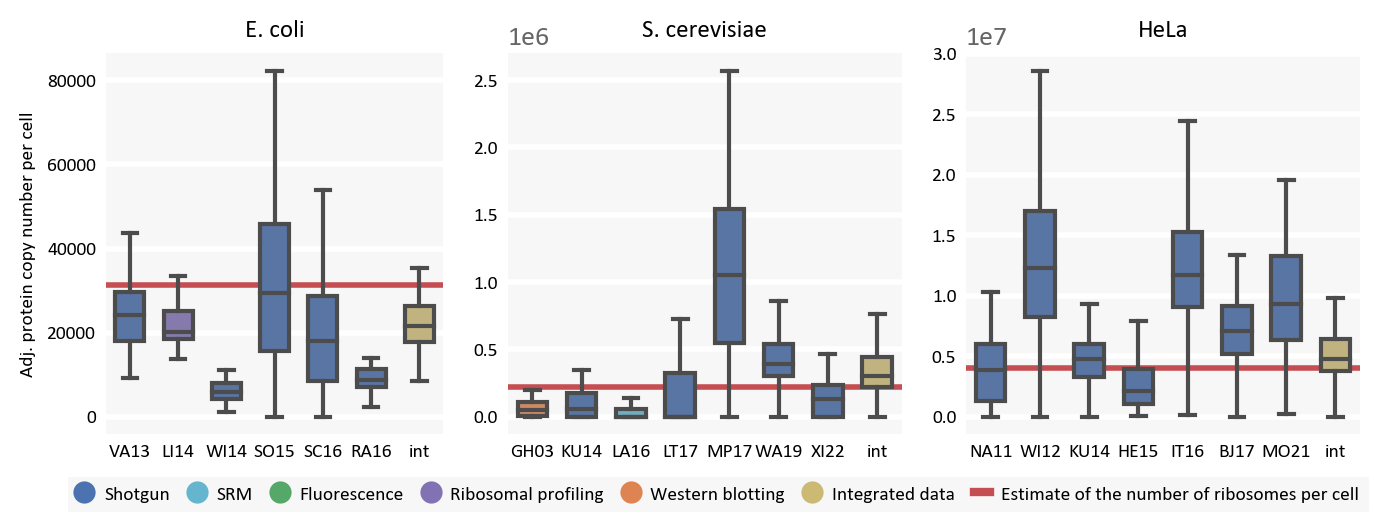

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(7, 2.5), dpi=200, layout='tight', gridspec_kw={'width_ratios': data.groupby('object').size().iloc[[0,2,1]]})

for i, j in enumerate(data['object'].unique()):
    object_data_gen = data[data['object'] == j].set_index('code')
    object_colors = list(object_data_gen['method'].map(method_color_dict).values) + ['C8']
    
    rib_data = pd.read_excel(f'../results/ribosome_{j}.xlsx', index_col=0)
    
    axes[i].axhline(ribosomes[i], color='C3', zorder=0, linewidth=2)
    sns.boxplot(ax=axes[i], data=rib_data, showfliers=False, width=0.6, zorder=3, palette=object_colors)

    axes[i].set_title(title_dict[j], fontsize=9)
    axes[i].grid(False, axis='x')
    axes[i].tick_params(labelsize=7)

axes[0].set_ylabel('Adj. protein copy number per cell', fontsize=7)
fig.legend(handles=color_legend3, prop={'size': 7}, loc=8, bbox_to_anchor=(0.52, -0.06), handletextpad=0.6, handlelength=0.8, ncol=7, framealpha=1, columnspacing=1)  
plt.savefig('../results/graphs/graph_7_ribosome_numbers.png', bbox_inches='tight')

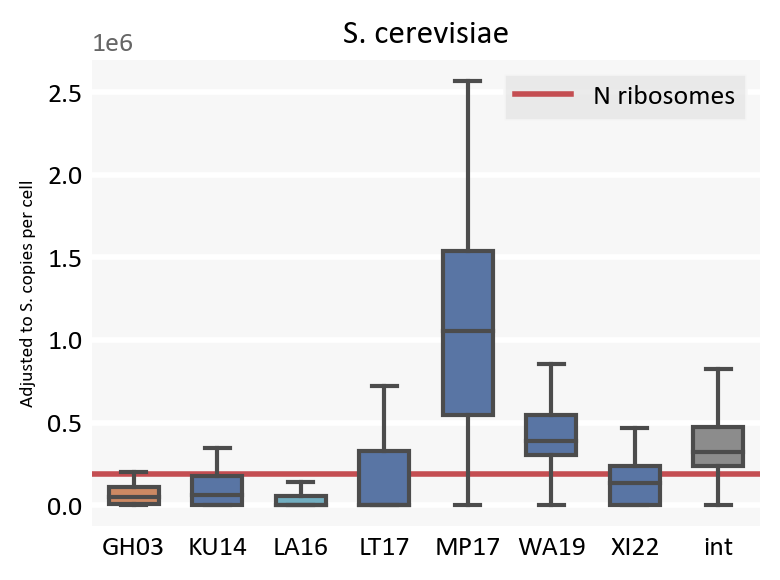

In [23]:
object_data_gen = data[data['object'] == 'scerevisiae'].set_index('code')
object_colors = list(object_data_gen['method'].map(method_color_dict).values) + ['C8']

rib_scerevisiae = pd.read_excel('../results/ribosome_scerevisiae.xlsx', index_col=0)

fig, ax = plt.subplots(figsize=(4,3), dpi=200, layout='tight')

ax.set_ylabel('Adjusted to S. copies per cell', fontsize=7)
    
ax.axhline(ribosomes[1], color='C3', zorder=0, linewidth=2, label='N ribosomes')
sns.boxplot(ax=ax, data=rib_scerevisiae, showfliers=False, width=0.6, zorder=3, palette=object_colors)
    
#ax.set_xticklabels([])
ax.legend(loc='upper right')
ax.set_title('S. cerevisiae')
ax.grid(False, axis='x')

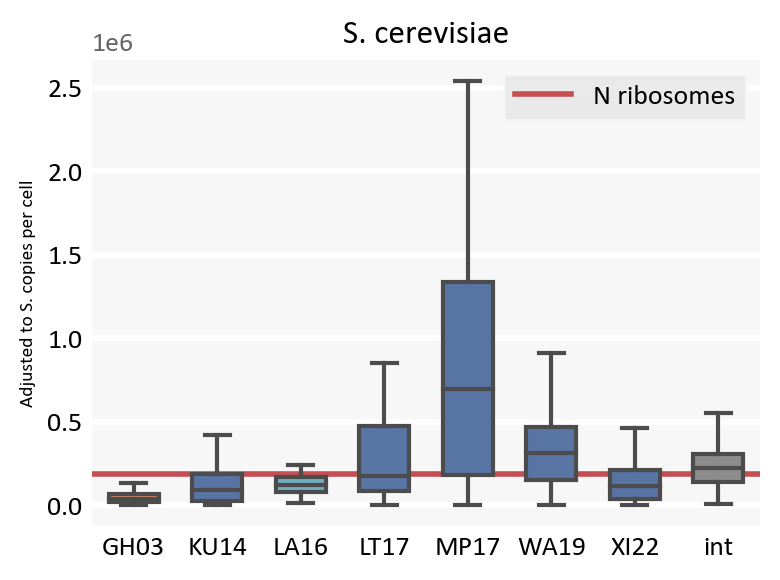

In [25]:
object_data_gen = data[data['object'] == 'scerevisiae'].set_index('code')
object_colors = list(object_data_gen['method'].map(method_color_dict).values) + ['C7']

rib_scerevisiae = pd.read_excel('../results/ribosome_scerevisiae.xlsx', index_col=0)

fig, ax = plt.subplots(figsize=(4,3), dpi=200, layout='tight')

ax.set_ylabel('Adjusted to S. copies per cell', fontsize=7)
    
ax.axhline(ribosomes[1], color='C3', zorder=0, linewidth=2, label='N ribosomes')
sns.boxplot(ax=ax, data=rib_scerevisiae, showfliers=False, width=0.6, zorder=3, palette=object_colors)
    
#ax.set_xticklabels([])
ax.legend(loc='upper right')
ax.set_title('S. cerevisiae')
ax.grid(False, axis='x')

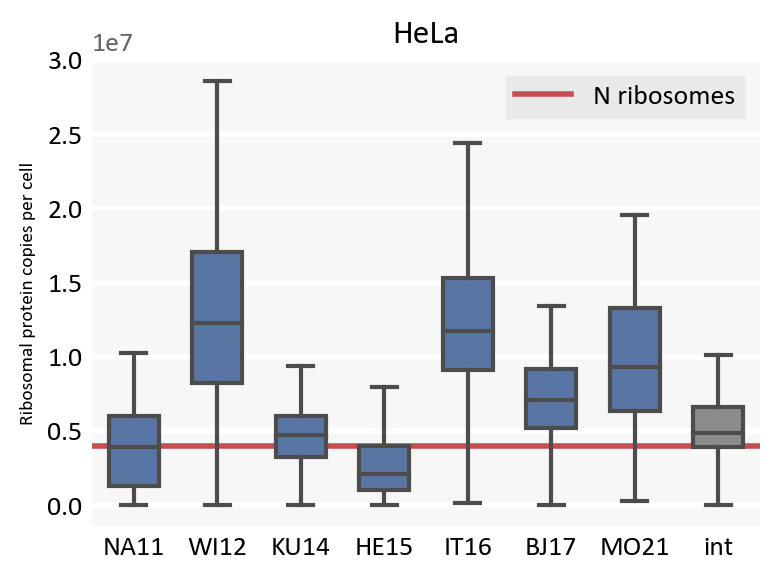

In [27]:
object_data_gen = data[data['object'] == 'hela'].set_index('code')
object_colors = list(object_data_gen['method'].map(method_color_dict).values) + ['C7']

rib_hela = pd.read_excel('../results/ribosome_hela.xlsx', index_col=0)

fig, ax = plt.subplots(figsize=(4,3), dpi=200, layout='tight')

ax.set_ylabel('Ribosomal protein copies per cell', fontsize=7)
    
ax.axhline(ribosomes[2], color='C3', zorder=0, linewidth=2, label='N ribosomes')
sns.boxplot(ax=ax, data=rib_hela, showfliers=False, width=0.6, zorder=3, palette=object_colors)
    
#ax.set_xticklabels([])
ax.legend(loc='upper right')
ax.set_title('HeLa')
ax.grid(False, axis='x')

In [2]:
int_hela = pd.read_excel('../results/proteome_hela_normalized.xlsx')['avg']
int_scerevisiae = pd.read_excel('../results/proteome_scerevisiae_normalized.xlsx')['avg']
int_ecoli = pd.read_excel('../results/proteome_ecoli_normalized.xlsx')['avg']

In [35]:
int_ecoli.median()

145.0

In [36]:
int_scerevisiae.median()

1887.5

In [37]:
int_hela.median()

15654.0

In [3]:
len(int_ecoli) #91

3852

In [4]:
len(int_scerevisiae) #77

4680

In [6]:
len(int_hela) #60

12653